Principal component analysis is one of the oldest tools to be implemented for analyzing feature sets in the data. It is fundamentally a dimensionality reduction technique targeted to reduce noise, feature reduction/extraction and engineering. It can also allow for providing 'new' features where are not necessarily correlated ensuring indenpedent treatment on the model.

## General idea: 
PCA introduces a new set of variables (called principal components, PCs) by linear combination of the original variables in the data, standardized to zero mean and unit variance (see Figure 12.8 for a toy example in two dimensions). The PCs are chosen such that they are uncorrelated, and they are ordered such that the first component captures the largest possible amount of variation in the data, and subsequent components capture increasingly less. Usually, key features in the data can be seen from only the first two or three PCs.

Example: If we are trying to understand the effect of weight, age, and height in humans, the weight of the subject is an correlated variable to other two. Height is, in some way, related to weight and that is in a way related to age of the person. Hence understanding effect of one variable on the output without the effect on another is difficult if not impossible. Here, we can use PCA to project the age and weight in a new 2-D space where now the height can be related to THESE two variables independently. Now the drawback is that we do not necessarily know what do these two variables means. For understanding the inherent logic of the variables there are techniques like vari-max rotation used to recapture the projection that MIGHT be used to get the new variables. 

**When should you use PCA?**

- Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
- Do you want to ensure your variables are independent of one another?
- Are you comfortable making your independent variables less interpretable?

## Useful Resources: 

* [Jake VanderPlas's Python Data Science Handbook Chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

* [Tutorial on Principal Component Analysis](https://arxiv.org/pdf/1404.1100.pdf) by Jonathan Shlens (Google Research)

Currently, PCA, when categorizing it from ML-terminology standpoint, is considered as a dimensionality reduction and a fast-flexible unsupervised learning method. Let's look at simplified example: 

1. Two dimensional data-set

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [2]:
rng = np.random.RandomState(42)
x1=rng.randn(2,200) #Normally distributed 200 entries with 2 rows
factor=rng.rand(2,2) #factor to multiply the entries 

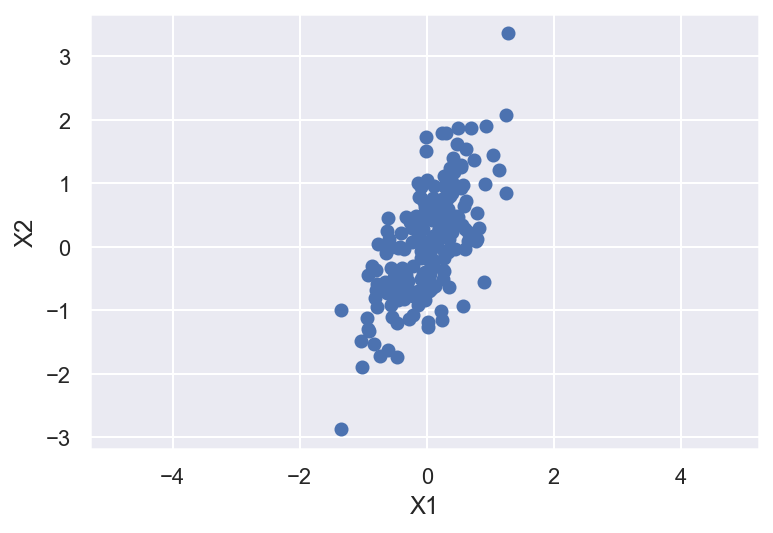

In [3]:
#Defining the vectors as column vectors 
X = np.dot(factor, x1).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal');

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [4]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2, random_state=42)
pca.fit(X)

PCA(n_components=2, random_state=42)

In [5]:
print(pca.components_)

[[ 0.41224135  0.91107468]
 [ 0.91107468 -0.41224135]]


In [6]:
print(pca.explained_variance_)

[0.86789943 0.11361735]


PCA analysis learns some quantities in the data. To visualize the 'Principal components' we can look at the `Components` which are the directions of the vector and `Explained Variance` is the square-length magnitude of the vector. 

[1.53619465 3.3950695 ]
[ 1.22839009 -0.55581963]


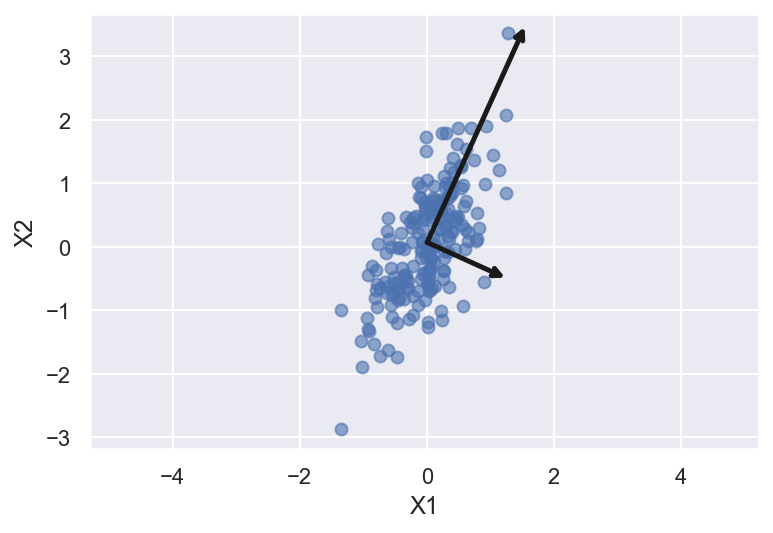

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2.5,
                    color='k',
                    shrinkA=0, shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

plt.scatter(X[:,0], X[:,1], alpha=0.6)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 4. * np.sqrt(length) #vector enhanced by a factor of 5 and the sqrt(lenght)
    print(v)
    draw_vector(pca.mean_, pca.mean_+v) #Pre PCA dataset mean

plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal');

The vectors above represent the principal axes of the data. Length of the vector is how imporatant are they. That is given by how much variance is explained by that axes. The projection of each data point onto the principal axes are the "principal components" of the data. If we plot the original data and the data being transformed such that the principal components are now the unit axes (through translation, rotation, and scaling of the data) we will get something like this

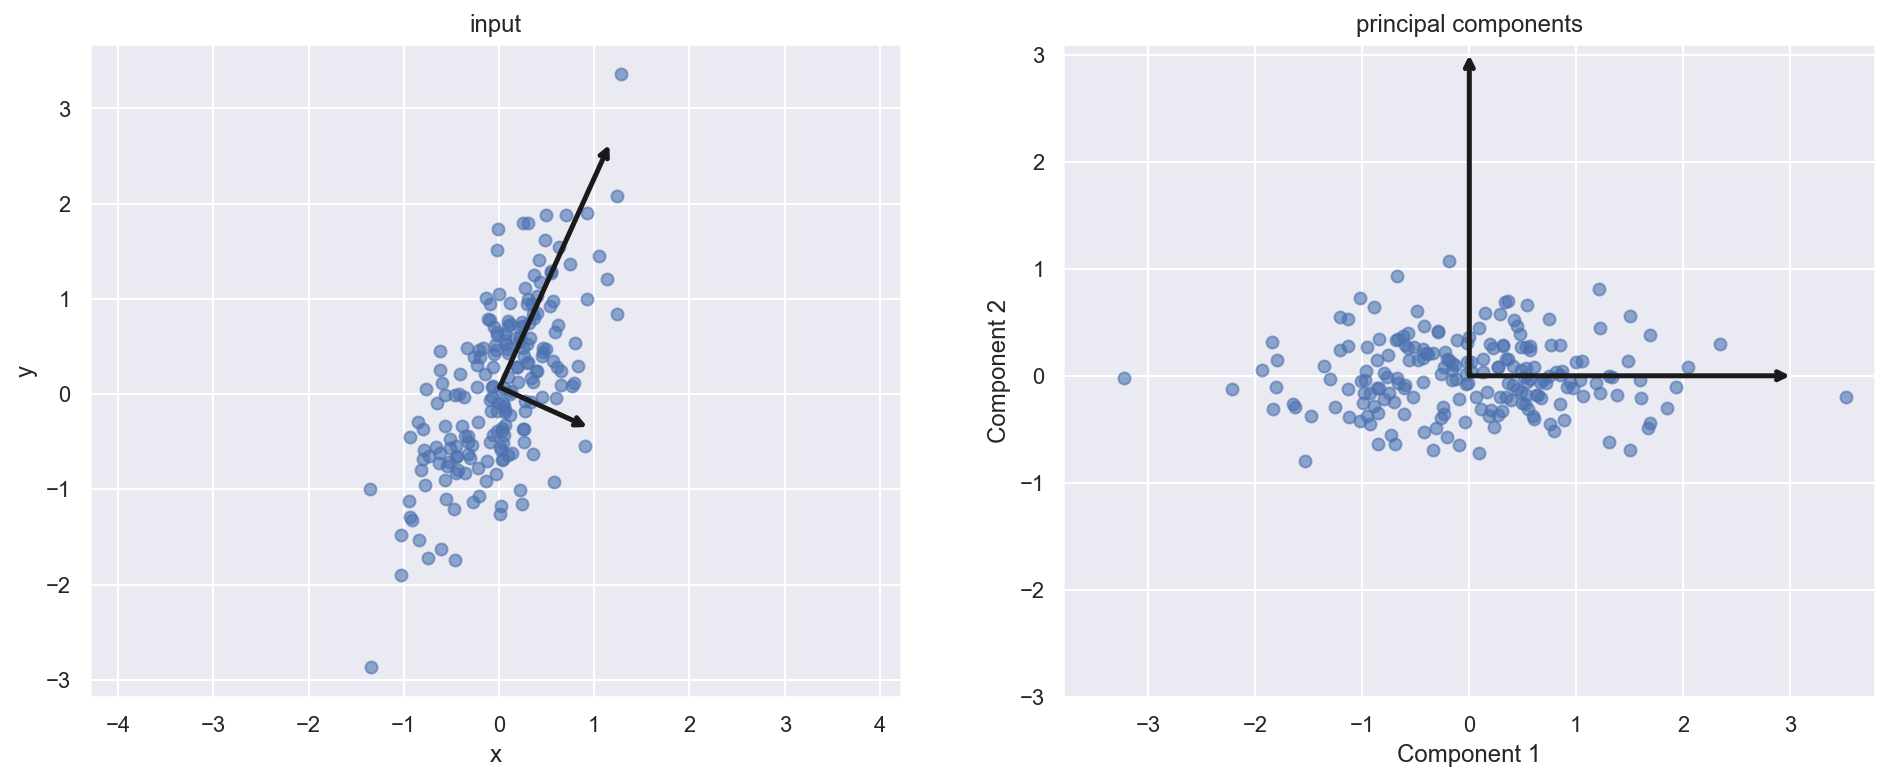

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.6)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='Component 1', ylabel='Component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1));

# Dimensionality reduction 

Through this analysis we can prune out certain components in the data which are not contributing to explaining the variance in the data. While the TRUE meaning the variable is convoluted (linear combination of original variable) in the analysis we can appreciate the dimensionality reduction. 

In [9]:
pca = PCA(n_components=1, random_state=42)
pca.fit(X) #Original data
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has just one-dimension. To visualize this effect we can perform inverse transform of this reduced data and plot with original data

(200, 2)


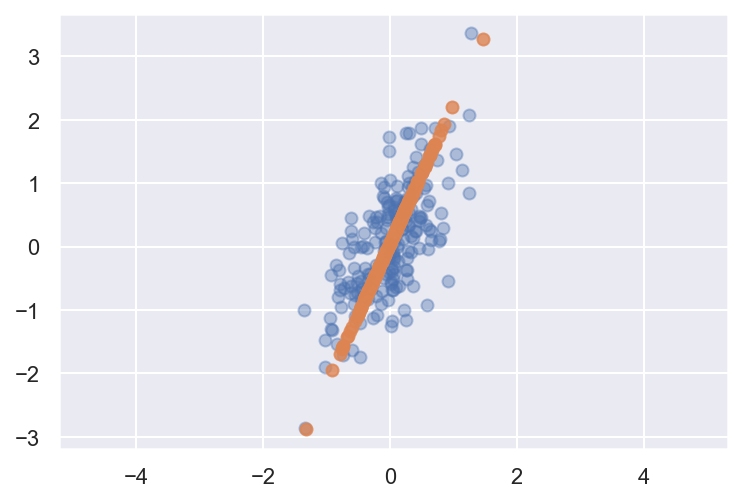

In [10]:
X_reduced = pca.inverse_transform(X_pca)
print(X_reduced.shape)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

## Going to higher dimensions
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. We can appreciate it more for classifying the feature sets used to predict the handwriten digits

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two

In [12]:
pca = PCA(n_components=2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the dataset on the transformed space along the two components 

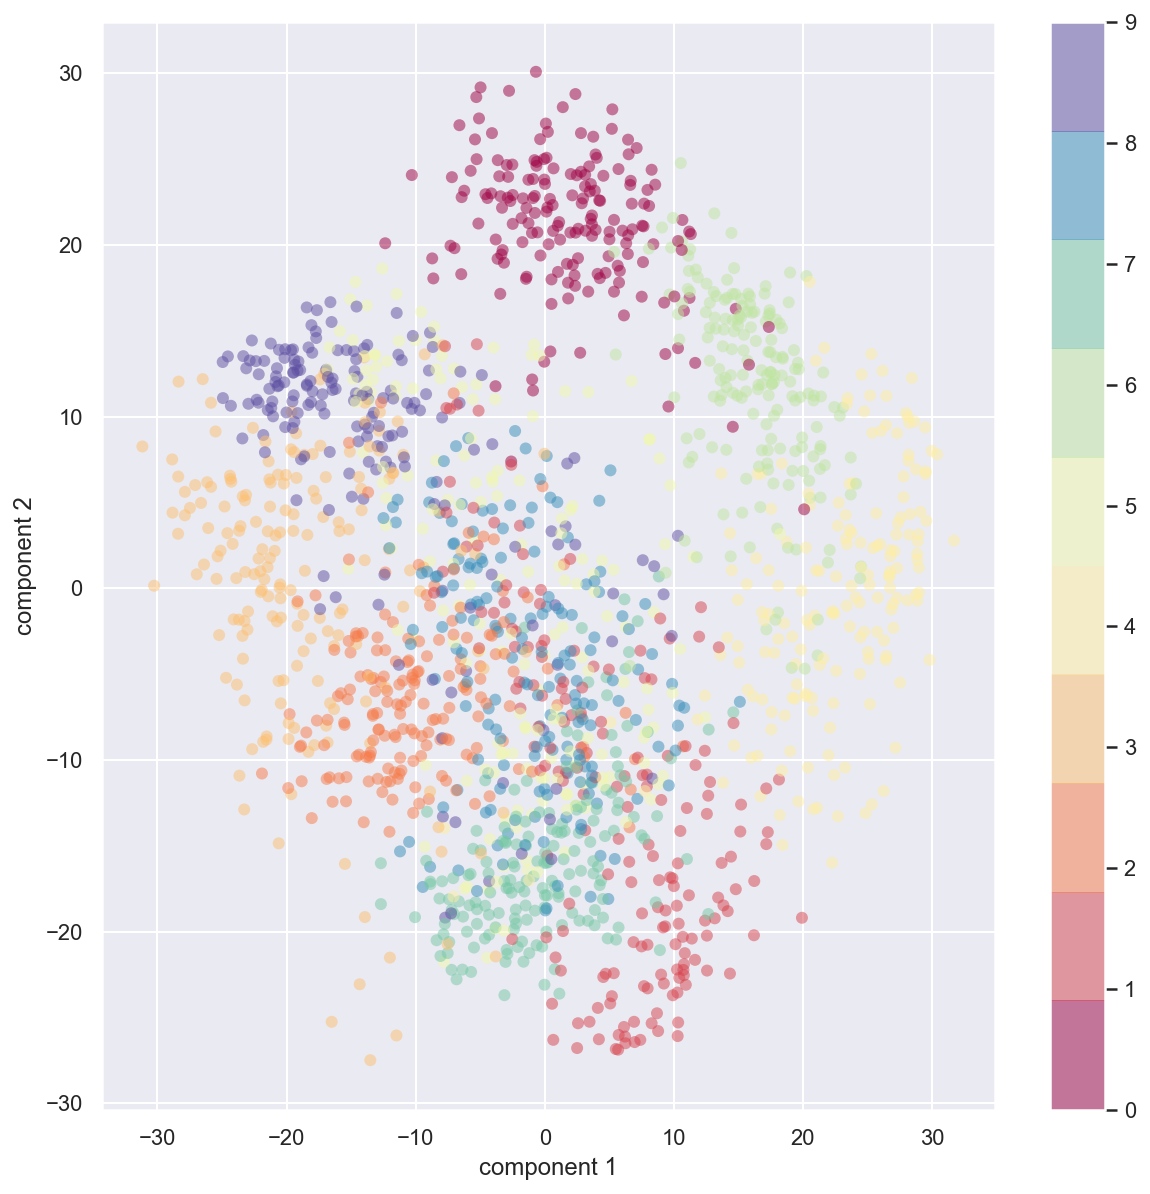

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Initially the data set for each image was a 64 dimensional entry. We now project that 64 dimensional data on a two component principal axes. The PCA routine has found the optimal stretch and rotation in the 64 dimensional space that allows us to see the layout of the digits in two dimensions. This was done in unsupervised manner. 

# How does it all work? 

Simple illustration to show the inner working of the PCA analysis. The fundamental goal of PCA is to identify the most meaningful basis to re-express the data-set. These basis are linearly independent from each other. 

> Is there another basis, which is a linear combination of the original basis, the best re-expresses the data?

## Important features/considerations: 
1. Linearity: The underlying idea of PCA is to find another basis for representing the data. This makes PCA is a change of basis problem. 

2. Variance: To identify which direction to project the data on, signal-to-noise ratio calculated by variance is assumed to model the interesting nature. Hence principal components with larger variance represent the interesting structure. 

3. Orthogonality: The principal components are orthonormal basis vectors. This allows PCA to provide an intuitive simplification 


Covariance matrix is a symmetric matrix that measures the degree of pair-wise linear relationship in the data. 
- The diagonal entries estimate the variance of the variable 
- while the off-diagonal entries estimate the covariance between a given pair of variables. 

Ideally, for the case to reduce dimensions and correlations the resulting covariance for the data from change of basis should have off-diagonal elements as 0 and only diagonal elements which are ordered magnitude-wise. 

In practice computing PCA of dataset following steps: 
1. Recast the data as zero mean dataset 
2. Compute eigenvectors for the covariance matrix for the dataset -- these are the principal components of the data
3. Those eigenvectors would diagonalize the covariance matrix of the original dataset
4. The diagonal entries of the new covariance matrix will give the variance along each principal component 

The diagonalised matrix from the above transformation is the covariance matrix for the projected data-set. This is made of the eigenvalues of the covariance matrix of original data

\begin{align*}
C_{Y}&=\frac{YY^{T}}{n} \\
&=\frac{(PX)(PX)^{T}}{n} \\ 
&=\frac{PXP^{T}X^{T}}{n} \\ 
&=\frac{P(XX)^{T}P^{T}}{n} \\
&=PC_{X}P^{T} \\
\end{align*}

Here P is the eigenvector of Cov(X) matrix 

Let's use the first example as a basis for explanation: 

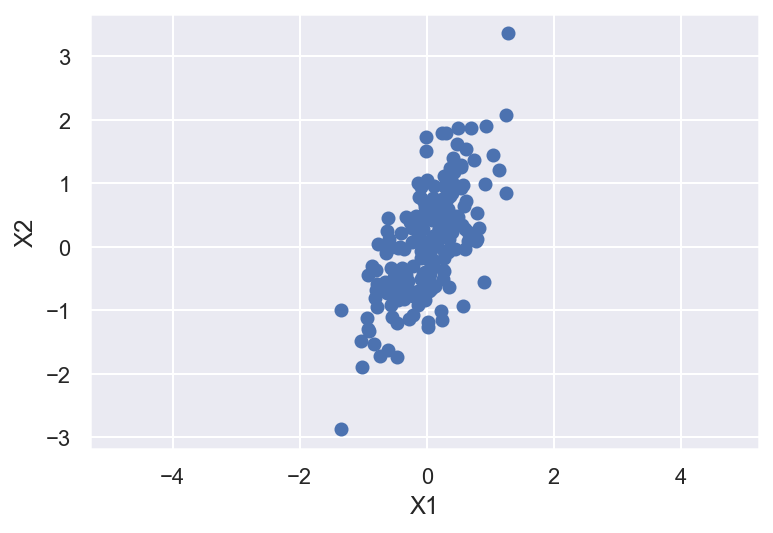

In [14]:
rng = np.random.RandomState(42)
x1=rng.randn(2,200) #Normally distributed 200 entries with 2 rows
factor=rng.rand(2,2) #factor to multiply the entries 

X = np.dot(factor, x1)
plt.scatter(X[0,:],X[1,:])
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal');

In [15]:
# Standarize the data 
X_center = np.empty(shape=X.shape)
X_center[0,:]=X[0,:]-np.mean(X[0,:])
X_center[1,:]=X[1,:]-np.mean(X[1,:])

In [16]:
#Estimate covariance of orginal data
cov_X = np.dot(X,X.T)/(X_center.shape[1]-1)
print(cov_X)

[[0.24184557 0.28376997]
 [0.28376997 0.74491787]]


In [17]:
# Eigendecomposition of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_X) #eigen_values[i] is eigenvalue of eigen_vector[:,i]
print(eigen_vectors)

[[-0.91195569 -0.4102887 ]
 [ 0.4102887  -0.91195569]]


In [18]:
values_vectors = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

In [19]:
#sort the vectors based on the values
values_vectors = sorted(values_vectors, key=lambda x:x[0], reverse=True)
print(values_vectors)

[(0.8725859273634107, array([-0.4102887 , -0.91195569])), (0.11417751236536822, array([-0.91195569,  0.4102887 ]))]


[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

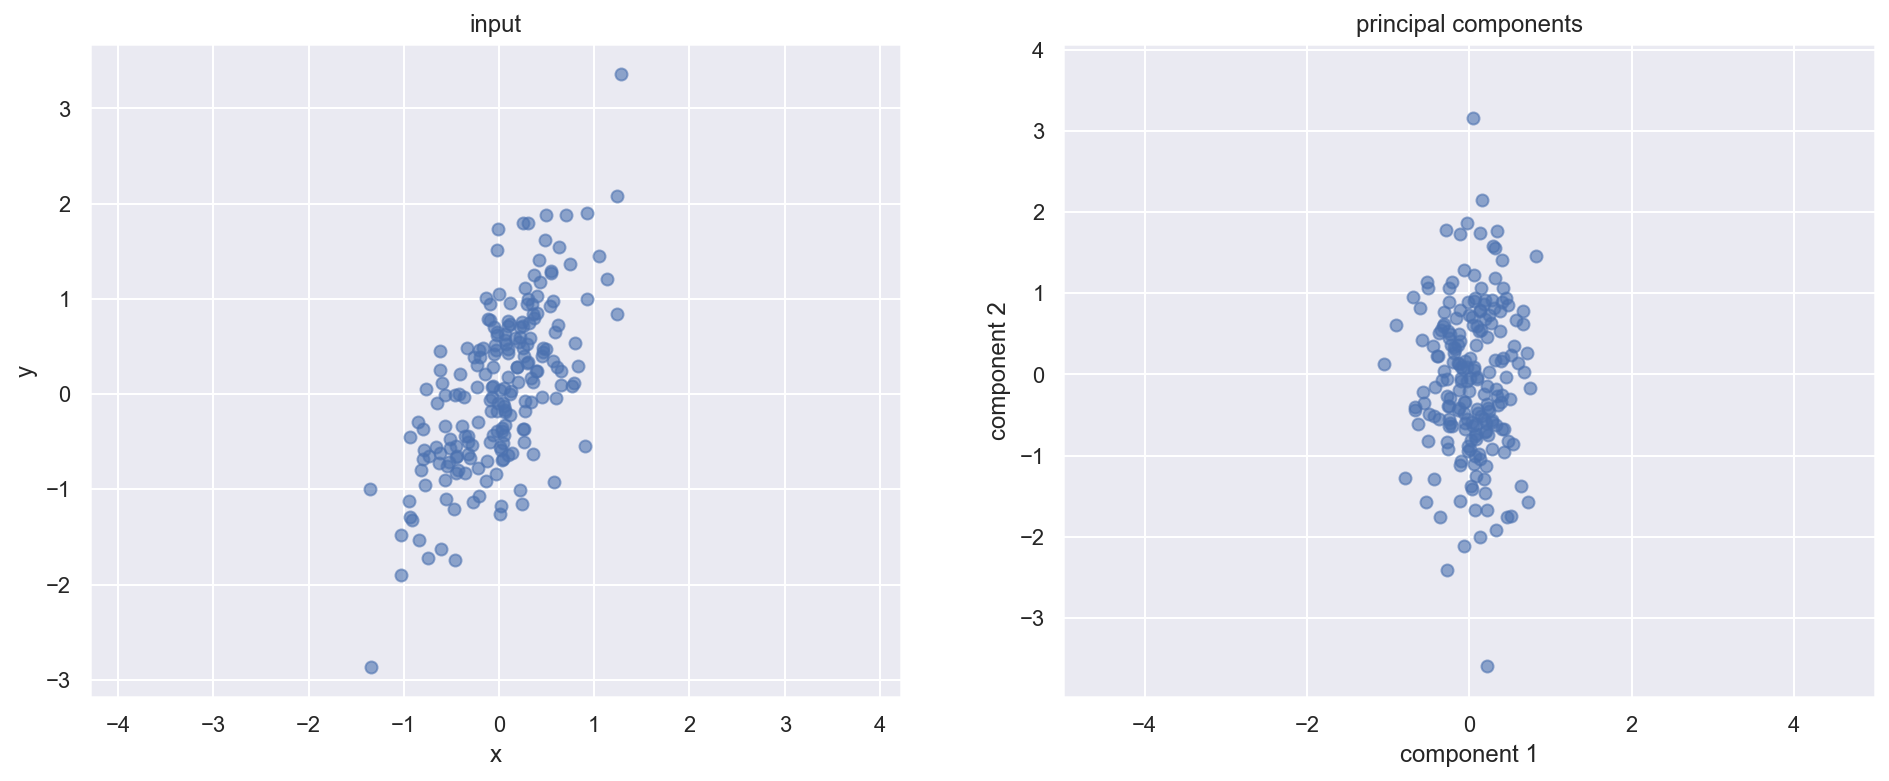

In [20]:
fig, ax_new = plt.subplots(1, 2, figsize=(16, 6))

# plot data
ax_new[0].scatter(X[0, :], X[1, :], alpha=0.6)
ax_new[0].axis('equal');
ax_new[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_transform = np.dot(eigen_vectors.T,X)
ax_new[1].scatter(X_transform[0, :], X_transform[1, :], alpha=0.6)
ax_new[1].axis('equal')
ax_new[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

In [21]:
pca=PCA(n_components=2, random_state=42)
pca.fit(X.T)
pca_results = [(np.abs(pca.explained_variance_[i]), pca.components_[:,i]) for i in range(len(pca.explained_variance_))]
pca_results = sorted(pca_results, key=lambda x:x[0], reverse=True)
print(pca_results)

[(0.867899431633577, array([0.41224135, 0.91107468])), (0.11361735469514019, array([ 0.91107468, -0.41224135]))]


In [22]:
cov_Y = np.dot(eigen_vectors.T,np.dot(cov_X,eigen_vectors))

In [23]:
np.around(cov_Y,4)

array([[0.1142, 0.    ],
       [0.    , 0.8726]])

# PCA on Iris dataset

The `Scikit-learn` package has some datasets and sample images. One of them is the Iris dataset.

The Iris dataset consists of measurements of sepals and petals of 3 different plant species:
1. Iris setosa
2. Iris versicolor
3. Iris virginica

![](./data/iris_schematic.png "Image courtesy: codecademy.com")

In [24]:
from sklearn import datasets 
import pandas as pd

iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target
iris_data_df = pd.DataFrame(X, columns = iris_data.feature_names) 
X = iris_data_df - iris_data_df.mean()

In [25]:
print(X.shape, y.shape, iris_data.feature_names)

(150, 4) (150,) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [26]:
pca_2D = PCA(n_components=2)
pca_2D.fit(X)
X_new = pca_2D.transform(X)
X_new.shape
data_total = np.vstack((X_new.T, y.T)).T
pca_df = pd.DataFrame(data_total, columns=["PC1", "PC2","y"])
name_dict = {'0':'Setosa','1':'Versicolour', '2':'Virginica'}
pca_df['flowers'] = [name_dict[str(i)] for i in y]

In [27]:
pca_df

,PC1,PC2,y,flowers
0,-2.684126,0.319397,0.0,Setosa
1,-2.714142,-0.177001,0.0,Setosa
2,-2.888991,-0.144949,0.0,Setosa
3,-2.745343,-0.318299,0.0,Setosa
4,-2.728717,0.326755,0.0,Setosa
...,...,...,...,...
145,1.944110,0.187532,2.0,Virginica
146,1.527167,-0.375317,2.0,Virginica
147,1.764346,0.078859,2.0,Virginica
148,1.900942,0.116628,2.0,Virginica


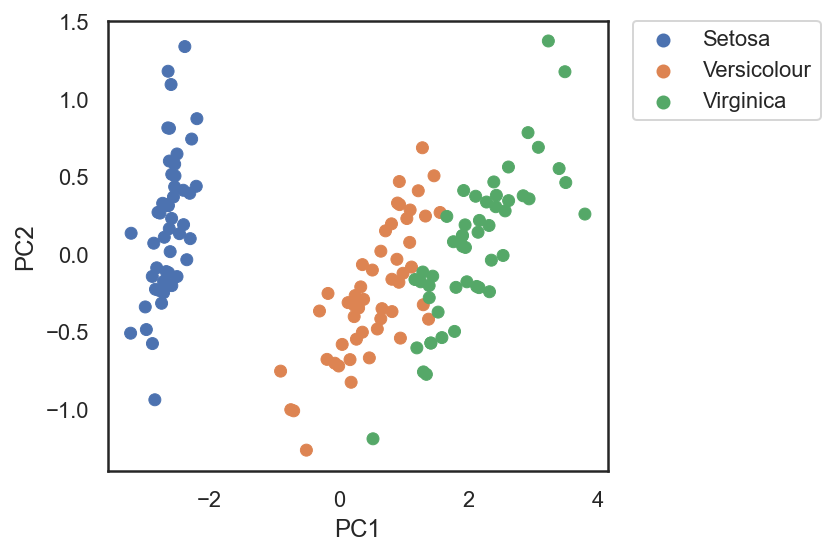

In [28]:
import seaborn as sns
sns.set(style="white", color_codes=True)
g = sns.scatterplot(x='PC1', y='PC2', hue='flowers', edgecolor=None, alpha=1.0, data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout();
#plt.savefig('PCA_iris.png',dpi=300);

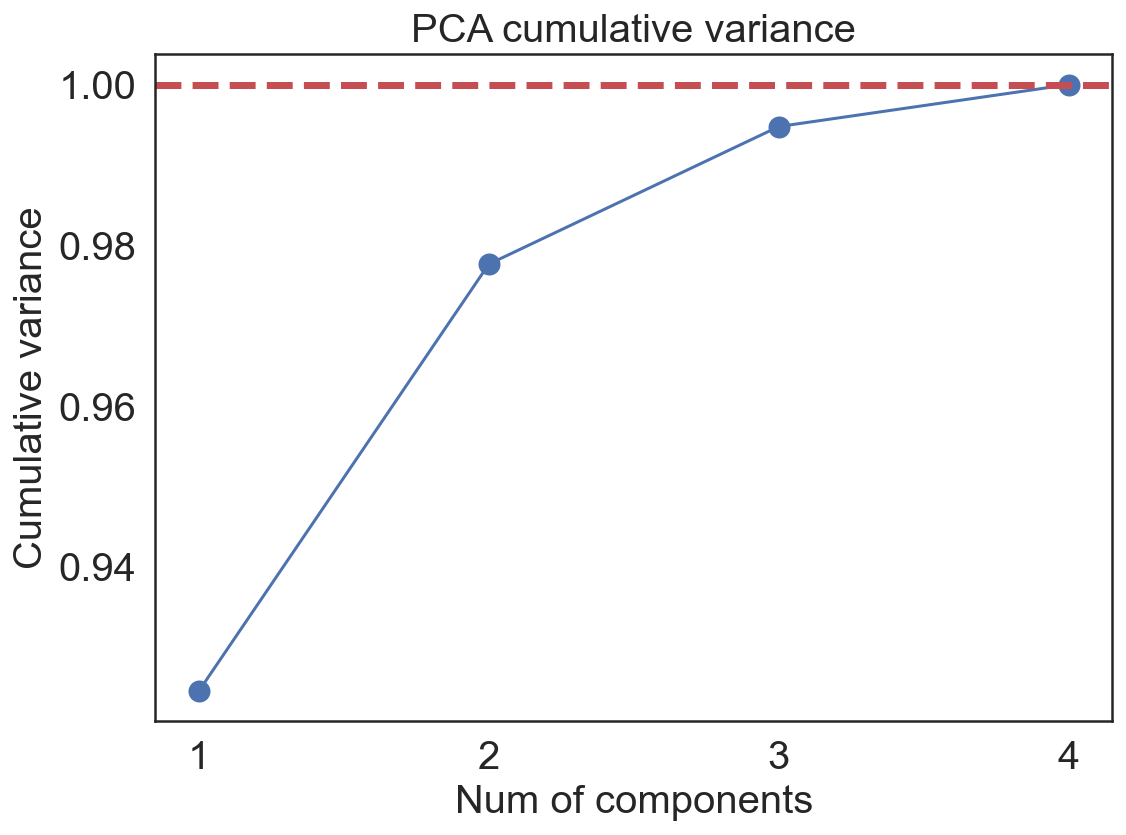

In [29]:
pca_var = PCA(n_components=4, random_state=42).fit(X)

fig, ax = plt.subplots(figsize=(8,6))
ax.tick_params(labelsize=20)
ax.set_xlabel('Num of components', fontsize=20)
ax.set_ylabel('Cumulative variance', fontsize=20)
ax.set_title('PCA cumulative variance', fontsize=20)

num_range = np.arange(1,len(pca_var.explained_variance_ratio_)+1)
pca_exp = np.cumsum(pca_var.explained_variance_ratio_)
ax.plot(num_range, pca_exp,'-o',markersize='10')
ax.axhline(linewidth='3.5',linestyle='--',color='r',y=1)
plt.xticks(num_range)
plt.tight_layout();

### Loadings 

PCA loadings are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed.

In [30]:
pca_df

,PC1,PC2,y,flowers
0,-2.684126,0.319397,0.0,Setosa
1,-2.714142,-0.177001,0.0,Setosa
2,-2.888991,-0.144949,0.0,Setosa
3,-2.745343,-0.318299,0.0,Setosa
4,-2.728717,0.326755,0.0,Setosa
...,...,...,...,...
145,1.944110,0.187532,2.0,Virginica
146,1.527167,-0.375317,2.0,Virginica
147,1.764346,0.078859,2.0,Virginica
148,1.900942,0.116628,2.0,Virginica


In [31]:
pca_2D.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [32]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
loadings_data = pd.DataFrame(pca_2D.components_.T, columns=['PC1','PC2'], index=iris_data.feature_names)
loadings_data

,PC1,PC2
sepal length (cm),0.361387,0.656589
sepal width (cm),-0.084523,0.730161
petal length (cm),0.856671,-0.173373
petal width (cm),0.358289,-0.075481


In [34]:
import matplotlib as mpl

def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, color='k', head_length = 0.02,alpha = 0.5)
        plt.text(coeff[i,0]* 0.8 * i, coeff[i,1] * 1.2, labels[i],ha = 'center', va = 'center', fontsize=20)

    cmap = plt.cm.viridis
    #norm = mpl.colors.Normalize(vmin=-10, vmax=10)
    #plt.scatter(x=pca_df['PC1'], y=pca_df['PC2'], color=cmap(norm(pca_df['y'].values)), alpha=1.0)
    plt.scatter(x=pca_df['PC1'], y=pca_df['PC2'], c=pca_df['y'].values, cmap="viridis")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

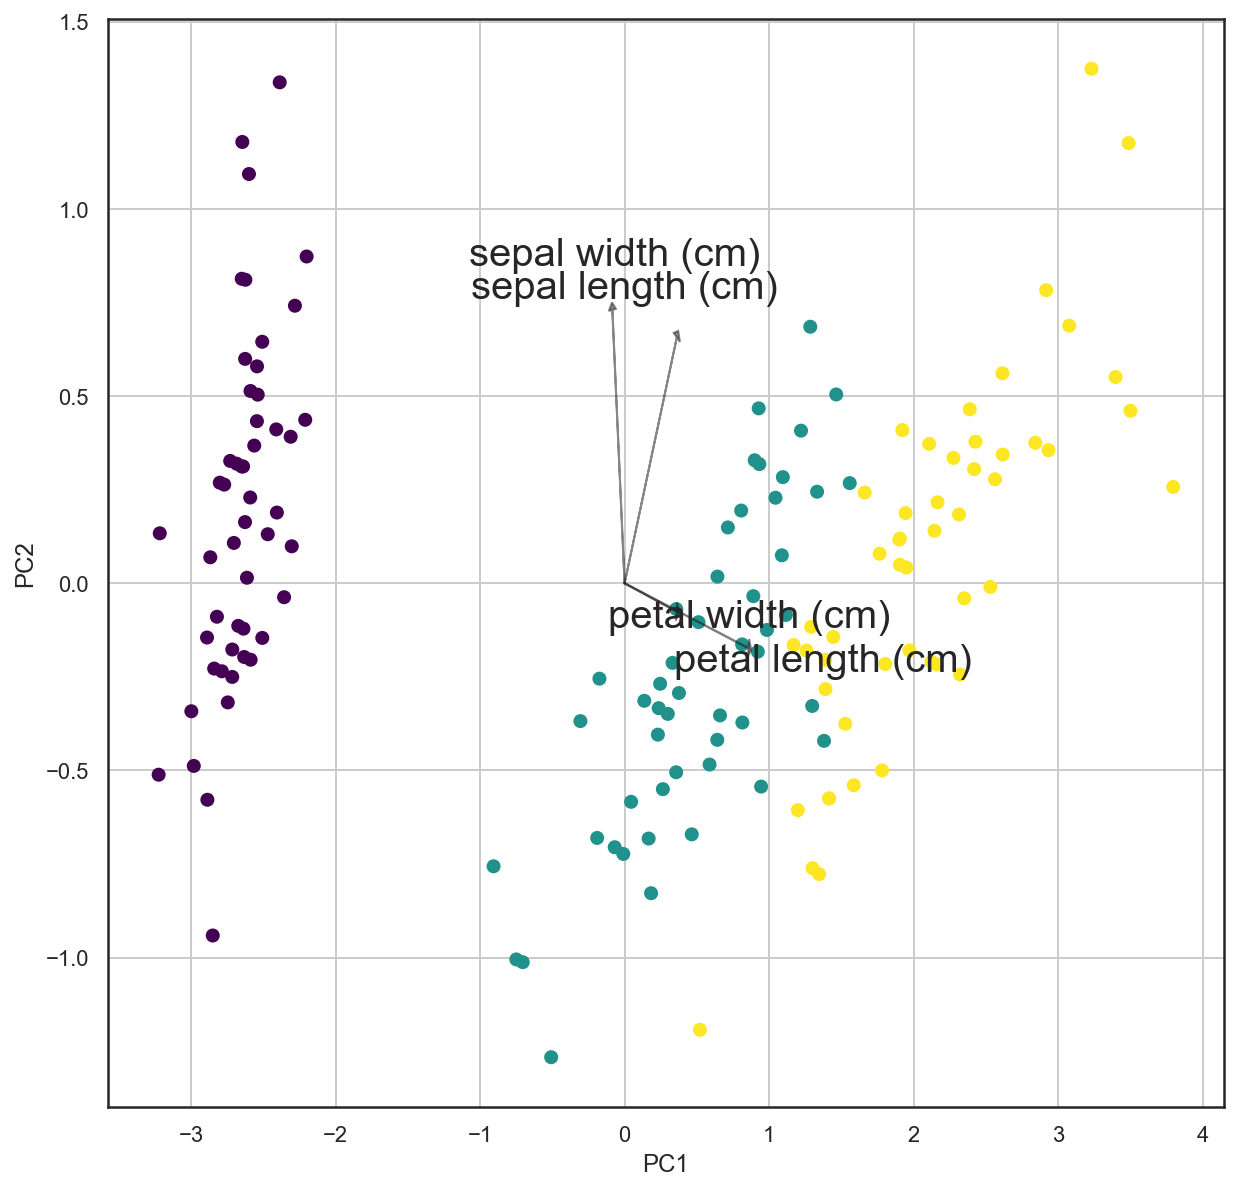

In [35]:
fig, ax = plt.subplots(figsize = (10,10))
loading_plot(pca_2D.components_.T, iris_data.feature_names)